In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve, average_precision_score, precision_score

In [68]:
train_df = pd.read_csv("../Train_Set.csv")
test_df = pd.read_csv("../Test_Set.csv")

In [69]:
print("Dataset Distribution")
print(train_df.shape)
print(test_df.shape)

print("Class Distribution")
print(train_df["class_label"].value_counts())
print(test_df["class_label"].value_counts())

Dataset Distribution
(841, 351)
(409, 351)
Class Distribution
class_label
cancer     781
healthy     60
Name: count, dtype: int64
class_label
cancer     368
healthy     41
Name: count, dtype: int64


In [70]:
X_train, y_train = train_df.drop(columns=["class_label"]), (train_df["class_label"] == "cancer").astype(int)
X_test , y_test  = test_df.drop(columns=["class_label"]) , (test_df["class_label"] == "cancer").astype(int)

In [71]:
# Train Logistic Regression to optimize recall since false negative is what we try to minimize in disease classification
# Here, we simply train plain Logistic regression then we'll improve it later on
clf = LogisticRegression()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(f"Recall Train: {recall_score(y_train, y_train_pred)}")
print(f"Recall Test: {recall_score(y_test, y_test_pred)}")
cm = confusion_matrix(y_test, y_test_pred, labels=[1,0])
print(pd.DataFrame(cm,
                   index=["actual_cancer", "actual_healthy"],
                   columns=["pred_cancer", "pred_healthy"]))
# Hihgly imbalance, everything is predicted as cancer. 

Recall Train: 1.0
Recall Test: 1.0
                pred_cancer  pred_healthy
actual_cancer           368             0
actual_healthy           41             0


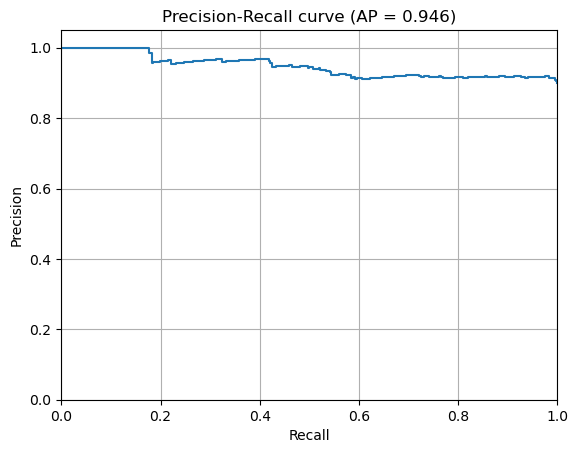

In [72]:
y_score = clf.predict_proba(X_test)[:, 1]           # prob of cancer
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

plt.figure()
plt.step(recall, precision, where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {ap:.3f})")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

In [73]:
target_recall = 0.95
idxs = np.where(recall[:-1] >= target_recall)[0]          # align with thresholds
best_idx = idxs[np.argmax(precision[idxs])]
best_thr = thresholds[best_idx]

y_pred_opt = (y_score >= best_thr).astype(int)
print("Threshold:", best_thr)
print("Recall   :", recall_score(y_test, y_pred_opt))
print("Precision:", precision_score(y_test, y_pred_opt))

cm = confusion_matrix(y_test, y_pred_opt, labels=[1, 0])
print(pd.DataFrame(cm,
                   index=["actual_cancer", "actual_healthy"],
                   columns=["pred_cancer", "pred_healthy"]))

Threshold: 0.9032291178209922
Recall   : 0.9836956521739131
Precision: 0.9187817258883249
                pred_cancer  pred_healthy
actual_cancer           362             6
actual_healthy           32             9


In [74]:
# We try to standardize it first
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

clf = LogisticRegression(solver="liblinear")

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(f"Recall Train: {recall_score(y_train, y_train_pred)}")
print(f"Recall Test: {recall_score(y_test, y_test_pred)}")
cm = confusion_matrix(y_test, y_test_pred, labels=[1,0])
print(pd.DataFrame(cm,
                   index=["actual_cancer", "actual_healthy"],
                   columns=["pred_cancer", "pred_healthy"]))


Recall Train: 0.9961587708066582
Recall Test: 0.970108695652174
                pred_cancer  pred_healthy
actual_cancer           357            11
actual_healthy           27            14


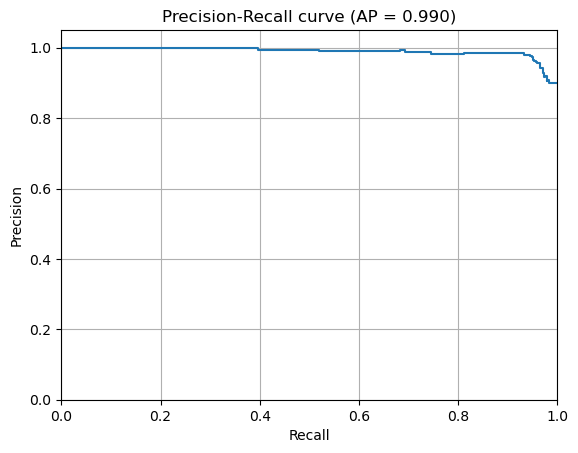

In [75]:
y_score = clf.predict_proba(X_test)[:, 1]           # prob of cancer
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

plt.figure()
plt.step(recall, precision, where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {ap:.3f})")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

In [76]:
target_recall = 0.95
idxs = np.where(recall[:-1] >= target_recall)[0]          # align with thresholds
best_idx = idxs[np.argmax(precision[idxs])]
best_thr = thresholds[best_idx]

y_pred_opt = (y_score >= best_thr).astype(int)
print("Threshold:", best_thr)
print("Recall   :", recall_score(y_test, y_pred_opt))
print("Precision:", precision_score(y_test, y_pred_opt))

cm = confusion_matrix(y_test, y_pred_opt, labels=[1, 0])
print(pd.DataFrame(cm,
                   index=["actual_cancer", "actual_healthy"],
                   columns=["pred_cancer", "pred_healthy"]))

Threshold: 0.7647365987292043
Recall   : 0.9510869565217391
Precision: 0.9749303621169917
                pred_cancer  pred_healthy
actual_cancer           350            18
actual_healthy            9            32
